# Chennai City Pizza Place Scour

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib import request


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim 

import requests # library to handle requests
 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# !conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
url = 'https://en.wikipedia.org/wiki/Category:Suburbs_of_Chennai'
page = requests.get(url).text
soup = BeautifulSoup(page, 'html.parser')
nl = []
print(soup.prettify())

 </a>
           </li>
           <li>
            <a href="/wiki/Thuraipakkam" title="Thuraipakkam">
             Thuraipakkam
            </a>
           </li>
          </ul>
         </div>
         <div class="mw-category-group">
          <h3>
           V
          </h3>
          <ul>
           <li>
            <a href="/wiki/Vadapalani" title="Vadapalani">
             Vadapalani
            </a>
           </li>
           <li>
            <a href="/wiki/Virugambakkam" title="Virugambakkam">
             Virugambakkam
            </a>
           </li>
           <li>
            <a href="/wiki/Vyasarpadi" title="Vyasarpadi">
             Vyasarpadi
            </a>
           </li>
          </ul>
         </div>
         <div class="mw-category-group">
          <h3>
           W
          </h3>
          <ul>
           <li>
            <a href="/wiki/Washermanpet" title="Washermanpet">
             Washermanpet
            </a>
           </li>
          </ul>
         </

In [3]:
for i in soup.find_all('div', class_ = 'mw-category')[0].findAll('li'):
    nl.append(i.text)
nl

['Alandur',
 'Anna Nagar',
 'Ashok Nagar, Chennai',
 'Assisi Nagar',
 'Ayanavaram',
 'Chennai city',
 'Chitlapakkam',
 'Chromepet',
 'Cowl Bazaar',
 'Egattur (Kanchipuram District)',
 'Guduvancheri',
 'Iyyapanthangal',
 'K. K. Nagar, Chennai',
 'Kallikuppam, Ambattur',
 'Kamarajapuram',
 'Keelkattalai',
 'Kelambakkam',
 'Kilpauk',
 'Kodambakkam',
 'Kodungaiyur',
 'Korattur',
 'Korukkupet',
 'Kosappur',
 'Madambakkam',
 'Madhavaram Milk Colony',
 'Madipakkam',
 'Maduravoyal',
 'Manapakkam',
 'Mannivakkam',
 'Mugalivakkam',
 'Nagappa Nagar',
 'Navalur',
 'Nazarethpettai',
 'Oragadam',
 'Padappai',
 'Palavakkam',
 'Pallavaram',
 'Pallikaranai',
 'Pammal',
 'Panambakkam',
 'Pattabiram',
 'Peerkankaranai',
 'Perambakkam',
 'Perungalathur',
 'Polichalur',
 'Poonamallee',
 'Potheri village, Kanchipuram',
 'Pudupakkam',
 'Pudur, Ambattur',
 'Puzhal',
 'Saidapet',
 'Selaiyur',
 'Sembakkam',
 'Semmencherry',
 'Senji, Chennai',
 'Sholinganallur',
 'Singaperumalkoil',
 'Tambaram',
 'Thalambur',
 '

In [4]:
header = ['Neighbourhood']
df = pd.DataFrame(nl, columns = header)
df.head()

,Neighbourhood
0,Alandur
1,Anna Nagar
2,"Ashok Nagar, Chennai"
3,Assisi Nagar
4,Ayanavaram


In [5]:
suburbs = ['Cowl Bazaar', 'Kallikuppam, Ambattur', 'Mannivakkam', 'Nazarethpettai', 'Polichalur', 'Potheri village, Kanchipuram', 'Pudur, Ambattur', 'Semmencherry', 'Senji, Chennai', 'Thiruperumbudur']
ct = len(suburbs)
for i in suburbs:
    indices = df[df['Neighbourhood'] == i].index
    df.drop(index = indices, axis = 0, inplace=True)
print('Removed {} Rows.'.format(ct))
df

Removed 10 Rows.


,Neighbourhood
0,Alandur
1,Anna Nagar
2,"Ashok Nagar, Chennai"
3,Assisi Nagar
4,Ayanavaram
5,Chennai city
6,Chitlapakkam
7,Chromepet
9,Egattur (Kanchipuram District)
10,Guduvancheri


In [6]:
df.shape

(56, 1)

In [7]:
lat = list()    
lon = list()

for i in df['Neighbourhood'].tolist():
    s = '{}'.format(i)
    geolocator = Nominatim(user_agent="Chennai_Explore")
    location = None
    location = geolocator.geocode(s)
    lat.append(location.latitude)
    lon.append(location.longitude)
print(lat)
print(lon)

[13.00282155, 13.0872004, 13.0400731, 13.1646096, 13.0946157, 13.0801721, 12.9330984, 12.9521897, 13.1071078, 12.8439952, 13.0379914, 12.9835279, 12.9724421, 12.9548473, 12.7871437, 13.0832149, 13.049207, 13.1327533, 13.1115392, 13.1215344, 13.1818301, 12.9057186, 13.1554081, 12.9611348, 13.0601732, 13.0147531, 13.0205798, 15.8329138, 15.4309743, 13.130791, 12.8876927, 12.95999, 12.989815700000001, 12.9304748, 12.9737938, 13.0945199, 13.1186572, 12.9080858, 13.0378065, 12.9145454, 13.0768552, 12.8097932, 13.1636492, 13.020817, 12.9187445, 12.7023624, 12.9174426, 12.9625594, 12.9299028, 12.836838, 12.9633872, 12.9385525, 13.0509304, 13.0475434, 13.1169726, 13.1136296]
[80.17191860222883, 80.2164421, 80.2159247, 80.2330002, 80.23541, 80.2838331, 80.1413832, 80.1411677, 79.8841717, 80.0608336, 80.135136, 80.1567029, 80.1215013, 80.1852685, 80.219987, 80.2379864, 80.2242829, 80.2444773, 80.1842767, 80.2837912, 80.2350982, 80.1543859, 80.2425246, 80.2001292, 80.1665988, 80.1744935, 80.16851

In [8]:
df['Latitudes'] = lat
df['Longitudes'] = lon
df.head()

,Neighbourhood,Latitudes,Longitudes
0,Alandur,13.002822,80.171919
1,Anna Nagar,13.087200,80.216442
2,"Ashok Nagar, Chennai",13.040073,80.215925
3,Assisi Nagar,13.164610,80.233000
4,Ayanavaram,13.094616,80.235410


In [12]:
geolocator = Nominatim(user_agent="Chennai_Explore")
location = geolocator.geocode('Chennai, Tamil Nadu, India')
latitude = location.latitude
longitude = location.longitude

#Generating the Map
chen_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitudes'], df['Longitudes'], df['Neighbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(chen_map)  
    
chen_map

### Saving our results.

In [14]:
df.to_csv('./Results/Chennai_Neighbourhoods.csv')
chen_map.save('./Results/ChennaiMap.html')

### Picking Venues using FourSquare API

In [16]:
# define Foursquare Credentials and Version

# CLIENT_ID = '' # your Foursquare ID
# CLIENT_SECRET = '' # your Foursquare Secret
# VERSION = '' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RJJDR0XZED35LVGODBFQY1J3Z5ID2C0HGRYVAI0HLI5WIS4Y
CLIENT_SECRET:OA2PJL3IO2KFD5DJVPJDZLB4AM2ORYANI4MDQ04M4342IY4S


In [20]:
radius = 2000
LIMIT = 100

venues = []

for lati, longi, neighborhood in zip(df['Latitudes'], df['Longitudes'], df['Neighbourhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lati,
        longi,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lati, 
            longi, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))
print(venues)

alambur', 12.836838, 80.222211, '"The Square", Novotel', 12.831708, 80.2317, 'Restaurant'), ('Thalambur', 12.836838, 80.222211, 'Saravana Bhavan @ CTS SIPCOT Siruseri', 12.824904471785848, 80.22062056943041, 'Vegetarian / Vegan Restaurant'), ('Thiruneermalai', 12.9633872, 80.1144526, 'Madurai Alagappar Chettinadu Restaurant', 12.949623858916377, 80.11144846171108, 'Indian Restaurant'), ('Thiruneermalai', 12.9633872, 80.1144526, 'Malar Medicals', 12.972174, 80.128546, 'Pharmacy'), ('Thiruneermalai', 12.9633872, 80.1144526, 'Expresss Avenue Mall', 12.977820071862986, 80.12393091625574, 'Plaza'), ('Thiruneermalai', 12.9633872, 80.1144526, 'Reliance Market', 12.961806, 80.132088, 'Warehouse Store'), ('Thuraipakkam', 12.9385525, 80.2372132, 'Barbeque  Nation', 12.94395700230097, 80.237864688547, 'North Indian Restaurant'), ('Thuraipakkam', 12.9385525, 80.2372132, 'Barbeque n Biryani', 12.945270553928847, 80.23890495300293, 'Indian Restaurant'), ('Thuraipakkam', 12.9385525, 80.2372132, 'Food

In [22]:
vdf = pd.DataFrame(venues)
vdf.columns = ['Neighbourhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueType']
vdf.head()

,Neighbourhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueType
0,Alandur,13.002822,80.171919,Radisson Blu,12.994229,80.187562,Hotel
1,Alandur,13.002822,80.171919,Cinnamon,12.993818,80.186314,Breakfast Spot
2,Alandur,13.002822,80.171919,The Great Kebab Factory,12.994200,80.187495,Indian Restaurant
3,Alandur,13.002822,80.171919,Trident,12.993860,80.186316,Hotel
4,Alandur,13.002822,80.171919,Chennai Airport,12.994119,80.170870,Airport Terminal


### Analysing the Venues

In [26]:
vdf.groupby('Neighbourhood').count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueType
Neighbourhood,,,,,,
Alandur,10,10,10,10,10,10
Anna Nagar,88,88,88,88,88,88
"Ashok Nagar, Chennai",91,91,91,91,91,91
Assisi Nagar,4,4,4,4,4,4
Ayanavaram,40,40,40,40,40,40
Chennai city,30,30,30,30,30,30
Chitlapakkam,16,16,16,16,16,16
Chromepet,15,15,15,15,15,15
Egattur (Kanchipuram District),1,1,1,1,1,1


In [46]:
vdf['VenueType'].unique()

array(['Hotel', 'Breakfast Spot', 'Indian Restaurant', 'Airport Terminal',
       'Trail', 'Metro Station', 'Fast Food Restaurant', 'Café', 'Park',
       'Vegetarian / Vegan Restaurant', 'South Indian Restaurant',
       'Sandwich Place', 'Gym', 'Snack Place',
       'Middle Eastern Restaurant', 'Juice Bar', 'Ice Cream Shop',
       'Coffee Shop', 'Chinese Restaurant', 'Bakery', 'Restaurant',
       'Department Store', 'Indian Sweet Shop', 'Shoe Store', 'Market',
       'Burger Joint', 'Italian Restaurant', 'Asian Restaurant',
       'American Restaurant', 'Paper / Office Supplies Store',
       'Pizza Place', 'Multiplex', 'Clothing Store', 'Farmers Market',
       'Jewelry Store', 'BBQ Joint', 'Bookstore',
       'Furniture / Home Store', 'New American Restaurant',
       'Electronics Store', 'Bistro', 'Shopping Mall', "Women's Store",
       'Bus Station', 'Mobile Phone Shop', "Men's Store", 'Food',
       'Sporting Goods Shop', 'Pub', 'Dessert Shop', 'Lounge',
       'Sculpture Gar

### User Interactive Query Input

In [187]:
l = pd.Series(vdf['VenueType'].unique())
profession = input('Enter Venue here')
x = list()
for i in l:
    if str.upper(profession) in str.upper(i):
        x.append(i)
print(x)

['Bus Station']


In [188]:
y = ''
if len(x)>1:
    ip = input('Enter one of these: {}'.format(x))
    for z in x:
        if str.upper(ip) in str.upper(z):
            y = z
elif len(x) == 1:
    y = x[0]
else:
    y = 'Pizza Place'
print(y)

Bus Station


### Filtering out the Venue

In [236]:
df_onehot = pd.get_dummies(vdf[['VenueType']], prefix="", prefix_sep="")

df_onehot['Neighbourhoods'] = vdf['Neighbourhood'] 

fixed_columns = [df_onehot.columns[-1]] + list(df_onehot.columns[:-1])
df_onehot = df_onehot[fixed_columns]

print(df_onehot.shape)
df_onehot.head()

(993, 134)


,Neighbourhoods,ATM,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Campground,Cantonese Restaurant,Chettinad Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Cafeteria,College Library,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Golf Course,Grocery Store,Gym,Gym Pool,Harbor / Marina,Hospital,Hotel,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Lake,Light Rail Station,Lounge,Market,Memorial Site,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,National Park,New American Restaurant,Nightclub,North Indian Restaurant,Paper / Office Supplies Store,Park,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool Hall,Pub,Resort,Rest Area,Restaurant,River,Road,Sandwich Place,Sculpture Garden,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Sporting Goods Shop,Sports Club,Stadium,Supermarket,Tea Room,Tennis Stadium,Theater,Theme Restaurant,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Alandur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Alandur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Alandur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Alandur,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Alandur,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [237]:
df_grouped = df_onehot.groupby(["Neighbourhoods"]).mean().reset_index()

print(df_grouped.shape)
df_grouped

(54, 134)


,Neighbourhoods,ATM,Afghan Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Andhra Restaurant,Asian Restaurant,BBQ Joint,Badminton Court,Bakery,Bar,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Buffet,Burger Joint,Bus Station,Cafeteria,Café,Campground,Cantonese Restaurant,Chettinad Restaurant,Chinese Restaurant,Clothing Store,Coffee Shop,College Cafeteria,College Library,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Daycare,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Farm,Farmers Market,Fast Food Restaurant,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Golf Course,Grocery Store,Gym,Gym Pool,Harbor / Marina,Hospital,Hotel,Hyderabadi Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Kerala Restaurant,Lake,Light Rail Station,Lounge,Market,Memorial Site,Men's Store,Metro Station,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,National Park,New American Restaurant,Nightclub,North Indian Restaurant,Paper / Office Supplies Store,Park,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool Hall,Pub,Resort,Rest Area,Restaurant,River,Road,Sandwich Place,Sculpture Garden,Shoe Store,Shopping Mall,Smoothie Shop,Snack Place,Soccer Stadium,South Indian Restaurant,Sporting Goods Shop,Sports Club,Stadium,Supermarket,Tea Room,Tennis Stadium,Theater,Theme Restaurant,Trail,Train,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Women's Store
0,Alandur,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000,0.000000,0.00,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.1,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Anna Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.011364,0.000000,0.022727,0.00,0.011364,0.00,0.000000,0.022727,0.000000,0.000000,0.000000,0.011364,0.011364,0.000000,0.056818,0.00,0.000000,0.000000,0.034091,0.045455,0.034091,0.000000,0.000000,0.00,0.000000,0.0,0.000000,0.000,0.045455,0.000000,0.000000,0.000000,0.022727,0.00,0.011364,0.090909,0.000000,0.011364,0.000000,0.000000,0.000,0.000000,0.000,0.011364,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.011364,0.00,0.147727,0.011364,0.000000,0.011364,0.011364,0.011364,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.011364,0.000000,0.022727,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.011364,0.011364,0.000000,0.00,0.045455,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.022727,0.00,0.000000,0.011364,0.000000,0.011364,0.011364,0.00,0.011364,0.000000,0.011364

In [238]:
len(df_grouped[df_grouped[y] > 0])

18

In [192]:
df_place = df_grouped[["Neighbourhoods",y]]
df_place

,Neighbourhoods,Bus Station
0,Alandur,0.000000
1,Anna Nagar,0.011364
2,"Ashok Nagar, Chennai",0.000000
3,Assisi Nagar,0.250000
4,Ayanavaram,0.000000
5,Chennai city,0.000000
6,Chitlapakkam,0.062500
7,Chromepet,0.066667
8,Egattur (Kanchipuram District),0.000000
9,Guduvancheri,0.000000


### Clustering to group Similar Areas

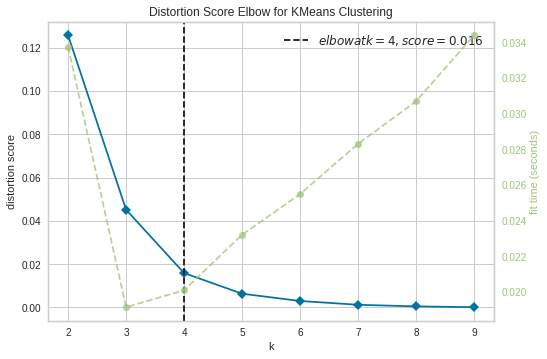

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f6697890b50>,
                 k=None, model=None)

In [250]:
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl

X, y = load_nfl()

df_clustering = df_place.drop(["Neighbourhoods"], 1)

# Use the quick method and immediately show the figure
kelbow_visualizer(KMeans(random_state=0), df_clustering, k=(2,10))

Best K = 4

In [251]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 1, 2, 2, 0, 0, 2, 2], dtype=int32)

In [252]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
df_merged = df_place.copy()

# add clustering labels
df_merged["Cluster Labels"] = kmeans.labels_

In [253]:
df_merged.rename(columns={"Neighborhoods": "Neighborhood"}, inplace=True)
df_merged.head()

,Neighbourhoods,Bus Station,Cluster Labels
0,Alandur,0.000000,2
1,Anna Nagar,0.011364,2
2,"Ashok Nagar, Chennai",0.000000,2
3,Assisi Nagar,0.250000,1
4,Ayanavaram,0.000000,2


In [254]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
df_merged = df_merged.join(df.set_index("Neighbourhood"), on="Neighbourhoods")

print(df_merged.shape)
df_merged.head() # check the last columns!

(54, 5)


,Neighbourhoods,Bus Station,Cluster Labels,Latitudes,Longitudes
0,Alandur,0.000000,2,13.002822,80.171919
1,Anna Nagar,0.011364,2,13.087200,80.216442
2,"Ashok Nagar, Chennai",0.000000,2,13.040073,80.215925
3,Assisi Nagar,0.250000,1,13.164610,80.233000
4,Ayanavaram,0.000000,2,13.094616,80.235410


In [255]:
df_final = df_merged.sort_values(["Cluster Labels"], ascending=True)
df_final.shape

(54, 5)

In [256]:
FinalList = list()
for i in range(df_final.shape[0]):
    if df_final.iloc[i, 2] <=1:
        FinalList.append(df_final.iloc[i,0])

In [257]:
DF = pd.DataFrame(FinalList[:10], columns = ['Places'])
DF.shape

(10, 1)

In [258]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_merged['Latitudes'], df_merged['Longitudes'], df_merged['Neighbourhoods'], df_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Top 10 Places to set up shop

In [259]:
DF

,Places
0,Madipakkam
1,Chitlapakkam
2,Chromepet
3,Tambaram
4,Iyyapanthangal
5,Sholinganallur
6,Selaiyur
7,Kelambakkam
8,Pallavaram
9,Perungalathur
